An online shopping site has the following primary pages or sections: Home, Products, Search, Prod_A, Prod_B, Prod_C, Cart, Purchase. A user may browse from "Home" to "Products" and then to one of the individual products. The user may also search for a specific product by using the "Search" function. A visit to "Cart" implies that the user has placed an item in the shopping cart, and "Purchase" indicates that the user has completed the purchase of items in the shopping cart. The site has collected some hypothetical session data for 100 sessions. This data is available on blackboard along with this assignment (CSV format).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.decomposition import PCA, NMF, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('sessions.csv')
df.head(3)

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase
0,1,0,0,0,0,0,0,0
1,1,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0


In [4]:
pca = PCA()
pca.fit(df.values)  
pca_df = pca.transform(df.values)
pca = pd.DataFrame({'PCA Ratios':pca.explained_variance_ratio_})
pca['Cumulative Sum'] = [sum(pca['PCA Ratios'][:i+1]) for i in range(pca.shape[0])]
pca

,PCA Ratios,Cumulative Sum
0,0.270455,0.270455
1,0.198952,0.469407
2,0.153578,0.622984
3,0.121150,0.744135
4,0.084811,0.828946
5,0.076862,0.905808
6,0.053510,0.959319
7,0.040681,1.000000


In [31]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df.values)
y_kmeans = kmeans.predict(df.values)

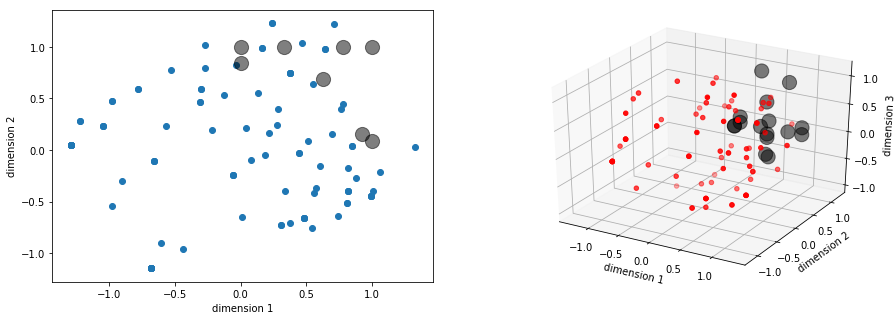

In [32]:
centers = kmeans.cluster_centers_

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(pca_df[:,0], pca_df[:,1])
ax1.set_xlabel('dimension 1')
ax1.set_ylabel('dimension 2')
ax1.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

ax2.scatter(pca_df[:,0], pca_df[:,1], pca_df[:,2], c = 'r', marker = 'o')
ax2.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);
ax2.set_xlabel('dimension 1')
ax2.set_ylabel('dimension 2')
ax2.set_zlabel('dimension 3')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [12]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df.values)
y_kmeans = kmeans.predict(df.values)

temp = pd.DataFrame(columns=df.columns.tolist()+['Cluster'])
for cluster in np.unique(y_kmeans):
    idx = np.where(y_kmeans==cluster)[0]
    x = df.loc[idx]
    x['Cluster'] = cluster
    temp = temp.append(x).reset_index(drop=True)
temp.to_csv('K4_clusters.csv')
np.round(kmeans.cluster_centers_,2)

array([[0.91, 0.45, 0.45, 0.68, 0.36, 0.27, 0.  , 0.  ],
       [0.77, 0.77, 0.04, 0.92, 0.46, 0.27, 1.  , 0.65],
       [0.09, 1.  , 0.38, 0.03, 1.  , 0.66, 0.47, 0.28],
       [0.85, 0.5 , 1.  , 0.65, 0.15, 0.55, 1.  , 0.65]])

In [13]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df.values)
y_kmeans = kmeans.predict(df.values)

temp = pd.DataFrame(columns=df.columns.tolist()+['Cluster'])
for cluster in np.unique(y_kmeans):
    idx = np.where(y_kmeans==cluster)[0]
    x = df.loc[idx]
    x['Cluster'] = cluster
    temp = temp.append(x).reset_index(drop=True)
temp.to_csv('K5_clusters.csv')
np.round(kmeans.cluster_centers_,2)

array([[ 0.86,  0.64,  0.21,  0.89,  0.39,  0.36,  0.36, -0.  ],
       [ 0.69,  0.75,  1.  , -0.  ,  0.62,  0.25,  0.44,  0.  ],
       [ 0.  ,  1.  ,  0.17,  0.  ,  1.  ,  0.83,  0.48,  0.39],
       [ 0.82,  0.41,  0.94,  0.76,  0.18,  0.65,  1.  ,  0.82],
       [ 0.69,  0.75,  0.06,  0.94,  0.5 ,  0.06,  1.  ,  1.  ]])

In [14]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df.values)
y_kmeans = kmeans.predict(df.values)

temp = pd.DataFrame(columns=df.columns.tolist()+['Cluster'])
for cluster in np.unique(y_kmeans):
    idx = np.where(y_kmeans==cluster)[0]
    x = df.loc[idx]
    x['Cluster'] = cluster
    temp = temp.append(x).reset_index(drop=True)
temp.to_csv('K6_clusters.csv')
np.round(kmeans.cluster_centers_,2)

array([[ 0.  ,  0.11,  0.11,  1.  ,  0.44, -0.  ,  0.78,  0.67],
       [ 0.17,  1.  ,  0.52,  0.04,  1.  ,  0.52,  0.22,  0.  ],
       [ 0.96,  0.71,  0.54,  0.79,  0.33,  0.38,  1.  ,  1.  ],
       [ 0.94,  0.82,  0.47,  0.94,  0.53,  0.76,  0.71,  0.  ],
       [ 1.  ,  0.41,  0.47,  0.47,  0.06,  0.12,  0.18,  0.  ],
       [ 0.  ,  1.  ,  0.1 , -0.  ,  1.  ,  0.9 ,  1.  ,  0.9 ]])

In [15]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df.values)
y_kmeans = kmeans.predict(df.values)

temp = pd.DataFrame(columns=df.columns.tolist()+['Cluster'])
for cluster in np.unique(y_kmeans):
    idx = np.where(y_kmeans==cluster)[0]
    x = df.loc[idx]
    x['Cluster'] = cluster
    temp = temp.append(x).reset_index(drop=True)
temp.to_csv('K7_clusters.csv')
np.round(kmeans.cluster_centers_,2)

array([[ 0.14,  1.  ,  0.5 ,  0.05,  1.  ,  0.55,  0.18,  0.  ],
       [ 0.9 ,  0.85,  0.45,  1.  ,  0.3 ,  0.3 ,  1.  ,  0.95],
       [ 1.  ,  0.69,  0.06,  0.81,  0.13,  0.19,  0.31,  0.  ],
       [ 0.09,  1.  ,  0.09, -0.  ,  1.  ,  0.82,  1.  ,  0.91],
       [ 0.91,  0.55,  0.73,  1.  ,  0.73,  1.  ,  0.64,  0.09],
       [ 1.  ,  0.42,  1.  , -0.  ,  0.17,  0.33,  0.67,  0.33],
       [ 0.  ,  0.  ,  0.12,  1.  ,  0.5 , -0.  ,  0.75,  0.62]])

In [16]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df.values)
y_kmeans = kmeans.predict(df.values)

temp = pd.DataFrame(columns=df.columns.tolist()+['Cluster'])
for cluster in np.unique(y_kmeans):
    idx = np.where(y_kmeans==cluster)[0]
    x = df.loc[idx]
    x['Cluster'] = cluster
    temp = temp.append(x).reset_index(drop=True)
temp.to_csv('K8_clusters.csv')
np.round(kmeans.cluster_centers_,2)

array([[ 0.81,  0.75,  0.06,  0.94,  0.25,  0.19,  0.31,  0.  ],
       [ 0.  ,  1.  ,  0.15, -0.  ,  1.  ,  0.77,  0.08,  0.  ],
       [ 0.36,  0.09,  0.45,  0.82,  0.27, -0.  ,  1.  ,  0.91],
       [ 0.86,  0.64,  0.86,  0.79,  0.14,  0.93,  1.  ,  0.71],
       [ 1.  ,  1.  ,  0.07,  0.93,  0.71,  0.21,  1.  ,  0.71],
       [ 0.6 ,  0.93,  1.  ,  0.2 ,  0.87,  0.47,  0.4 ,  0.  ],
       [ 0.  ,  1.  ,  0.11, -0.  ,  1.  ,  0.89,  1.  ,  1.  ],
       [ 1.  ,  0.  ,  0.75,  0.25,  0.12,  0.12,  0.13, -0.  ]])